In [ ]:
import requests
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


In [ ]:
api_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

try:
    print("Conectando a la API...")
    response = requests.get(api_url)
    response.raise_for_status()

    datos_json = response.json()
    print("Datos JSON obtenidos exitosamente.")

    df = pd.json_normalize(datos_json)
    print("DataFrame creado correctamente.")
    print(f"Dimensiones iniciales: {df.shape[0]} filas y {df.shape[1]} columnas.")

except requests.exceptions.RequestException as e:
    print(f"Error al conectar con la API: {e}")
except json.JSONDecodeError:
    print("Error: La respuesta de la API no es un JSON válido.")

df.head()

Conectando a la API...
Datos JSON obtenidos exitosamente.
DataFrame creado correctamente.
Dimensiones iniciales: 7267 filas y 21 columnas.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
nuevos_nombres = {
    'customerID': 'IDCliente', 'Churn': 'Evasion', 'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor', 'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes', 'customer.tenure': 'Antiguedad',
    'phone.PhoneService': 'ServicioTelefonico', 'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'ServicioInternet', 'internet.OnlineSecurity': 'SeguridadOnline',
    'internet.OnlineBackup': 'RespaldoOnline', 'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico', 'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingPeliculas', 'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionSinPapel', 'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales', 'account.Charges.Total': 'CargosTotales'
}
df.rename(columns=nuevos_nombres, inplace=True)
print("Columnas renombradas.")

df['Evasion'] = df['Evasion'].map({'No': 'No', 'Yes': 'Sí'})
df['AdultoMayor'] = df['AdultoMayor'].map({0: 'No', 1: 'Sí'})

# Reemplazar valores de "sin servicio" por un simple "No"
columnas_a_limpiar = ['MultiplesLineas', 'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas']
for columna in columnas_a_limpiar:
    df[columna] = df[columna].replace({'No internet service': 'No', 'No phone service': 'No'})

print("Valores categóricos estandarizados.")
df.head(2)

Columnas renombradas.
Valores categóricos estandarizados.


,IDCliente,Evasion,Genero,AdultoMayor,TienePareja,TieneDependientes,Antiguedad,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionSinPapel,MetodoPago,CargosMensuales,CargosTotales
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
print("--- Información General del DataFrame (Antes de la corrección) ---")
df.info()

df['CargosTotales'] = pd.to_numeric(df['CargosTotales'], errors='coerce')
print("\nTipo de dato de 'CargosTotales' corregido.")

print("\nCantidad de nulos antes de la limpieza:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nFilas con valores nulos eliminadas.")

print("\nCantidad de nulos después de la limpieza:")
print(df.isnull().sum())
print(f"\nDimensiones finales del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas.")

--- Información General del DataFrame (Antes de la corrección) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDCliente              7267 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7267 non-null   object 
 3   AdultoMayor            7267 non-null   object 
 4   TienePareja            7267 non-null   object 
 5   TieneDependientes      7267 non-null   object 
 6   Antiguedad             7267 non-null   int64  
 7   ServicioTelefonico     7267 non-null   object 
 8   MultiplesLineas        7267 non-null   object 
 9   ServicioInternet       7267 non-null   object 
 10  SeguridadOnline        7267 non-null   object 
 11  RespaldoOnline         7267 non-null   object 
 12  ProteccionDispositivo  7267 non-null   object 
 13  SoporteTecnico         7267 non-null   ob

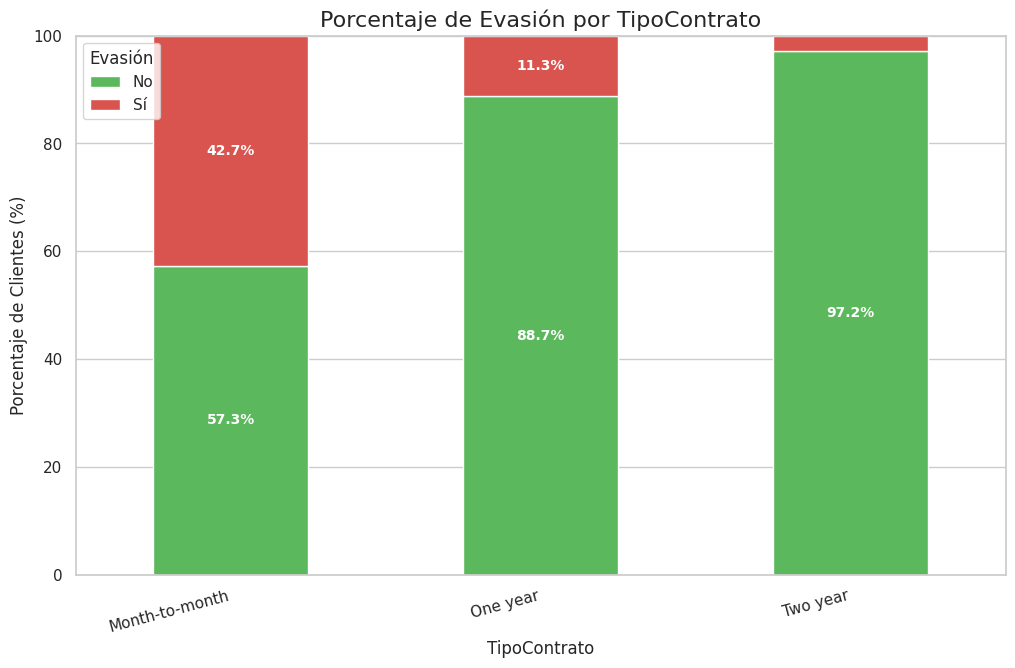

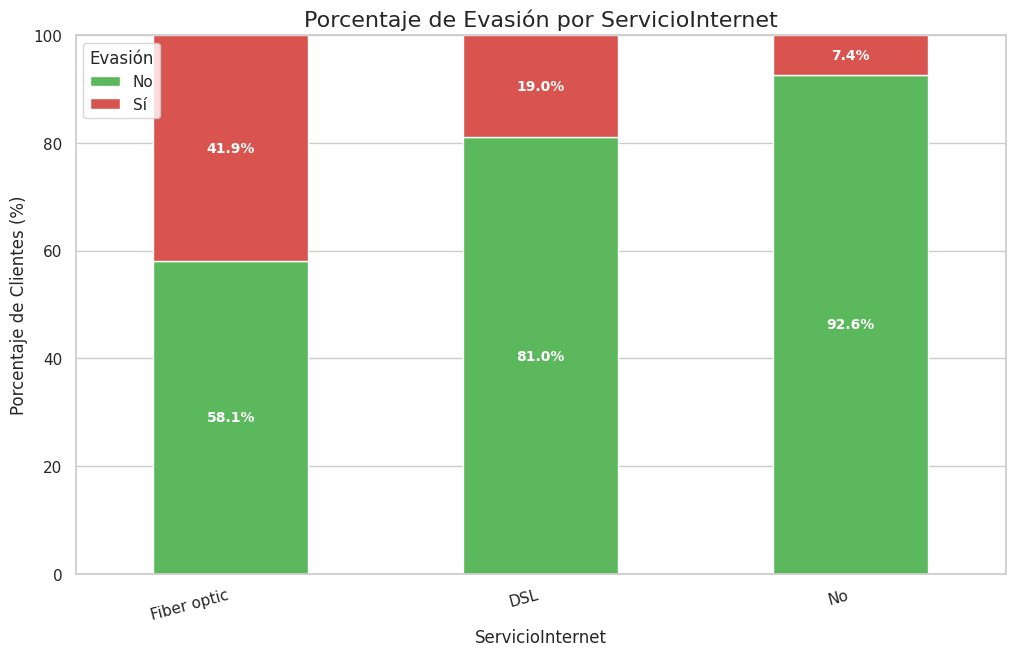

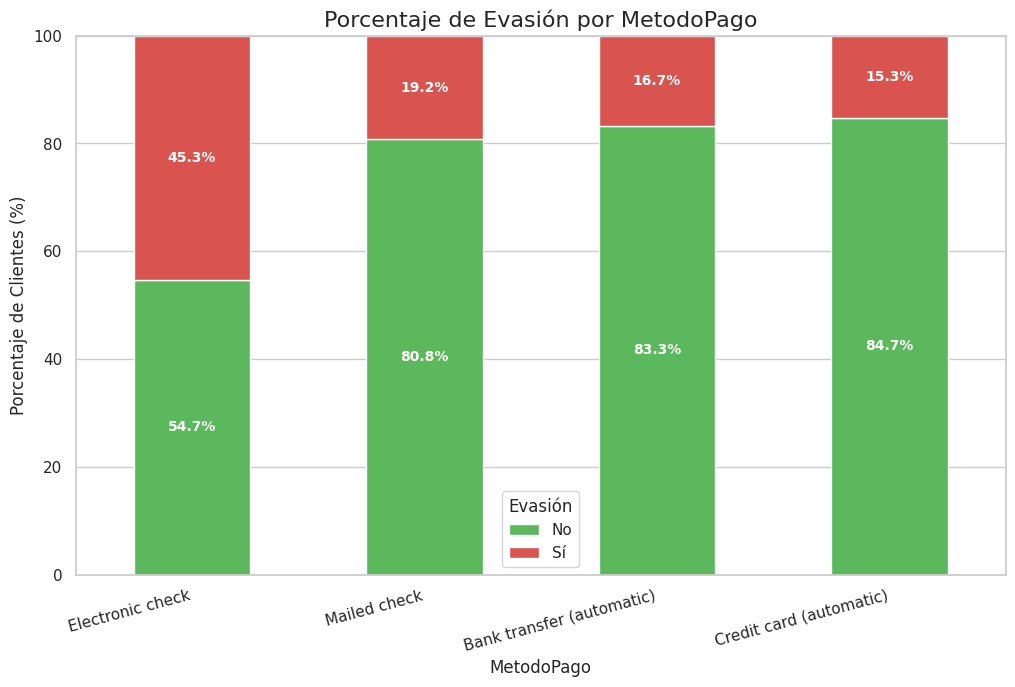

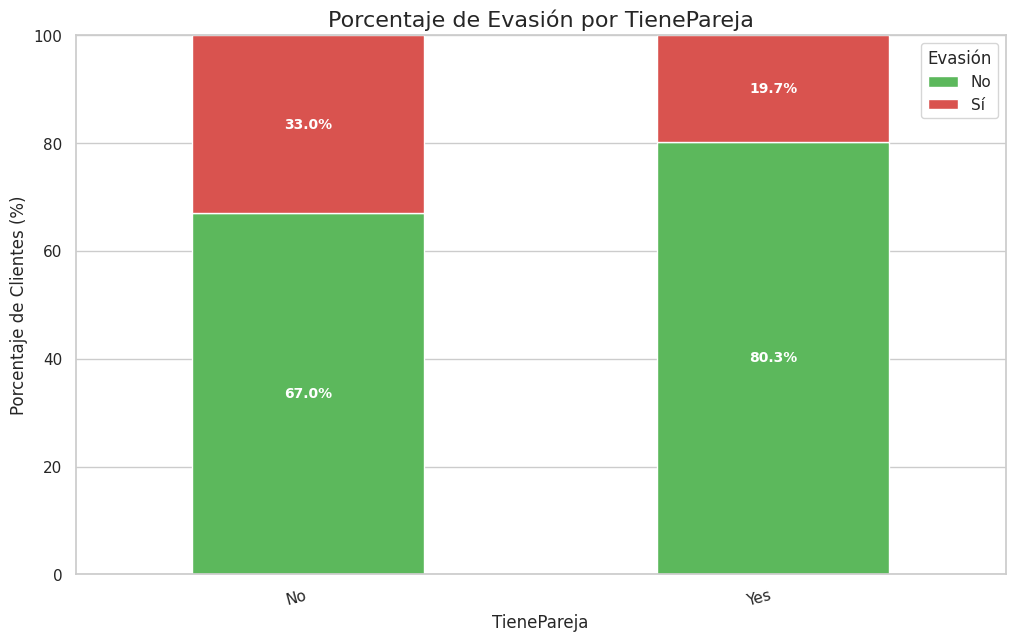

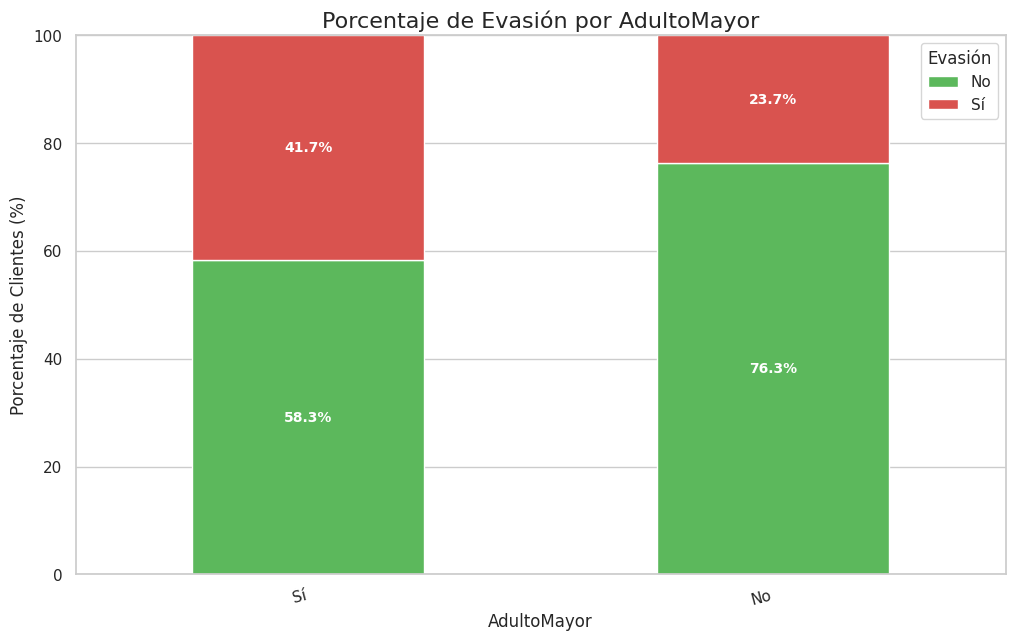

In [ ]:
columnas_categoricas = ['TipoContrato', 'ServicioInternet', 'MetodoPago', 'TienePareja', 'AdultoMayor']

for columna in columnas_categoricas:
    df_agrupado = df.groupby(columna)['Evasion'].value_counts(normalize=True).unstack() * 100
    df_agrupado = df_agrupado.sort_values(by='Sí', ascending=False)

    ax = df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#5cb85c', '#d9534f'])

    plt.title(f'Porcentaje de Evasión por {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Porcentaje de Clientes (%)', fontsize=12)
    plt.xticks(rotation=15, ha="right")
    plt.legend(title='Evasión', labels=['No', 'Sí'])
    plt.ylim(0, 100)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 5: 
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}%',
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    plt.show()

/tmp/ipython-input-4293403436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=columna, data=df, palette='coolwarm', order=['No', 'Sí'])


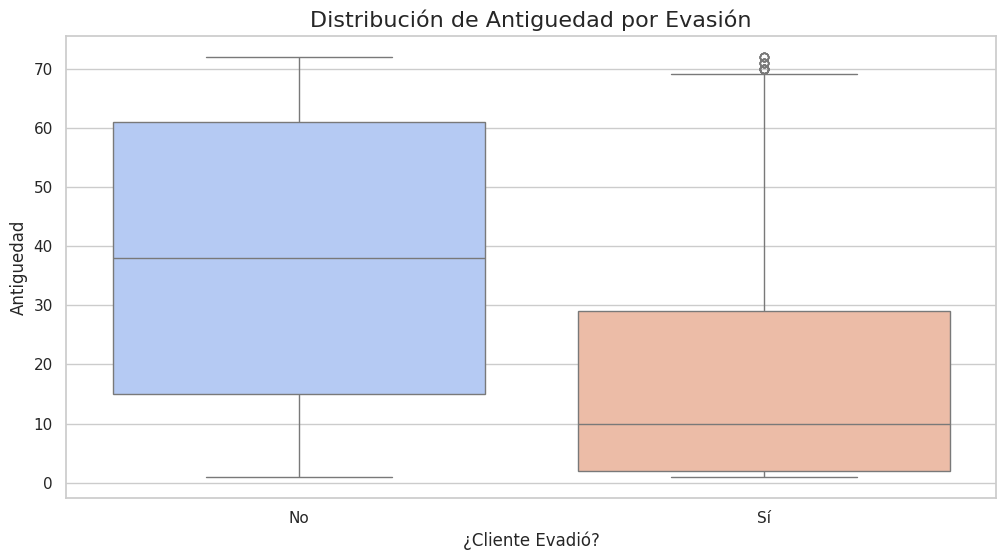

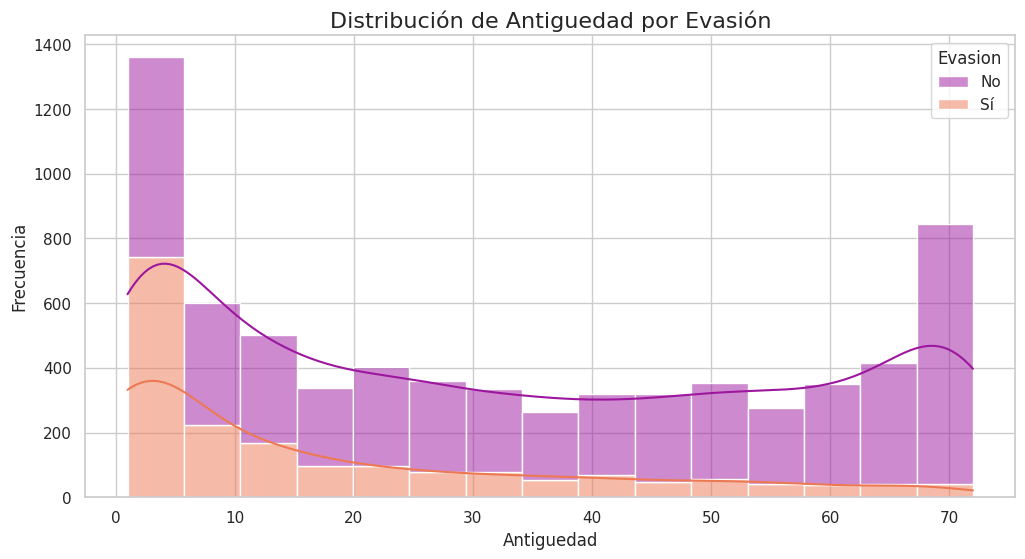

/tmp/ipython-input-4293403436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=columna, data=df, palette='coolwarm', order=['No', 'Sí'])


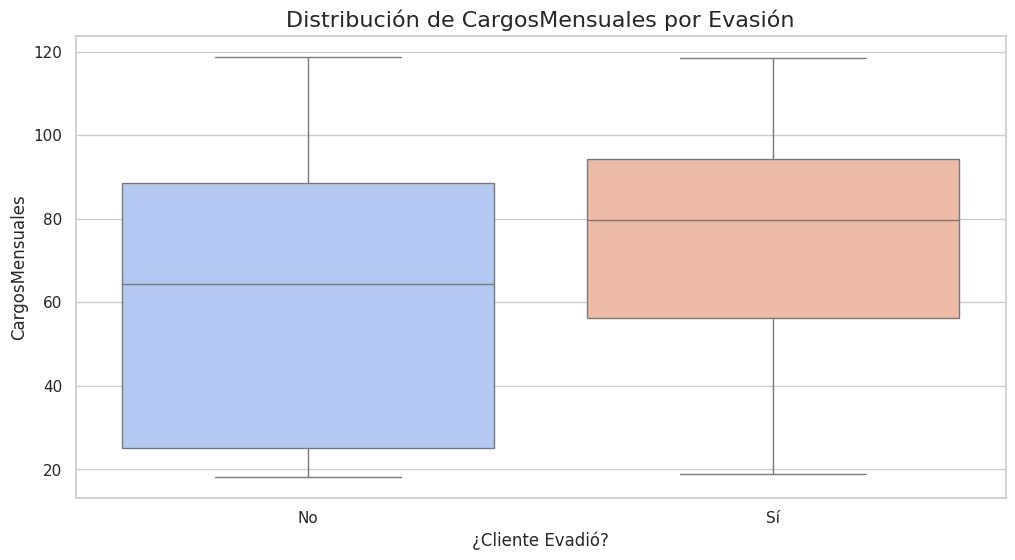

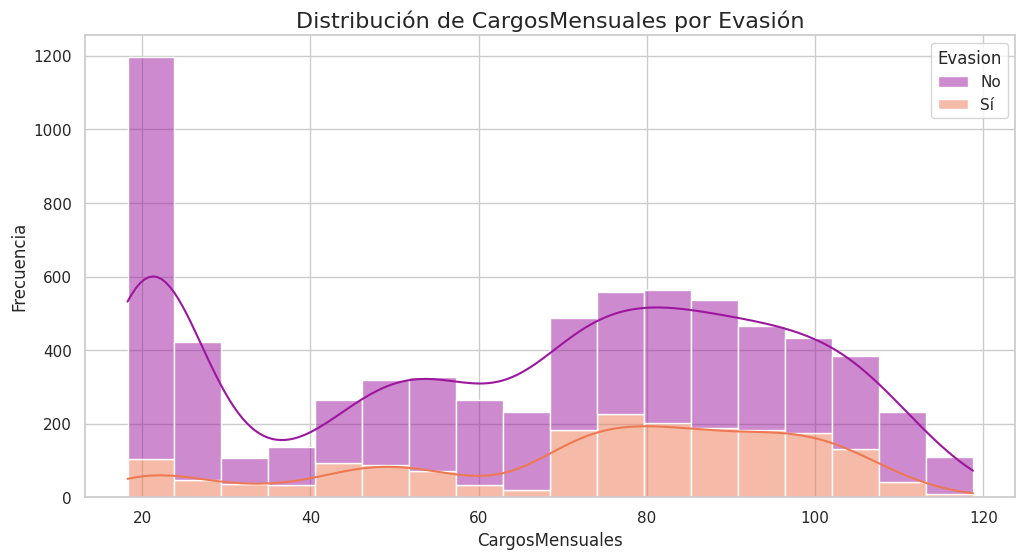

/tmp/ipython-input-4293403436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y=columna, data=df, palette='coolwarm', order=['No', 'Sí'])


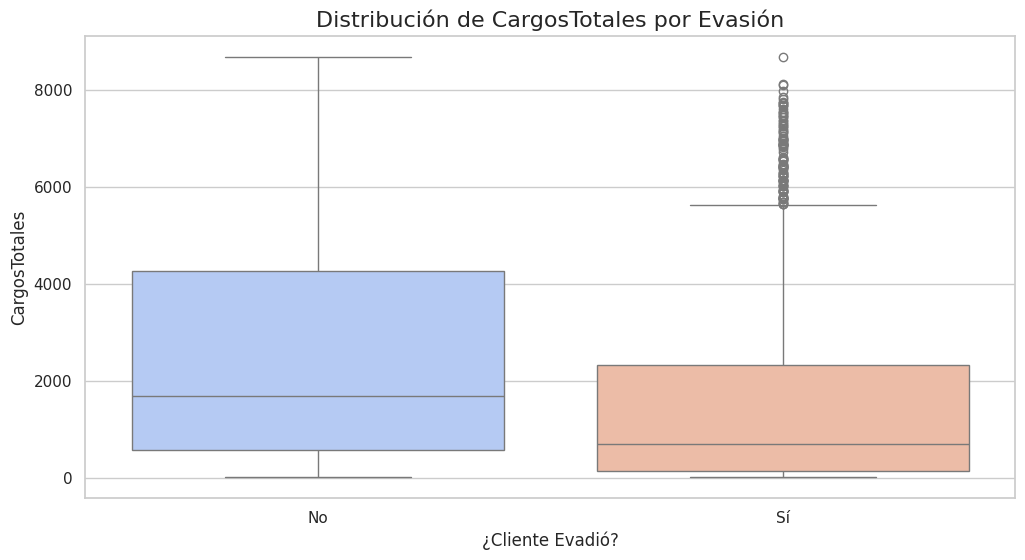

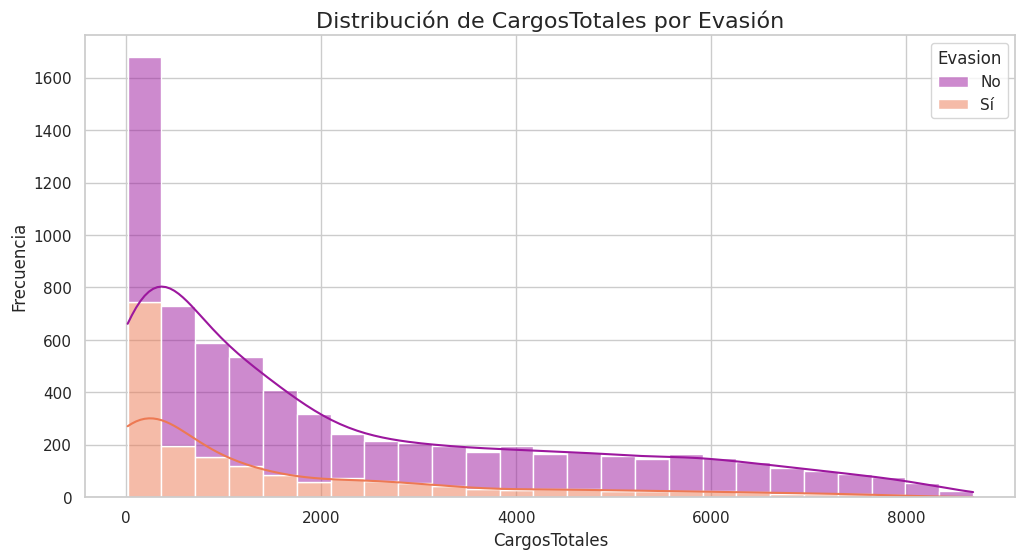

In [ ]:
columnas_numericas = ['Antiguedad', 'CargosMensuales', 'CargosTotales']

for columna in columnas_numericas:
    # Boxplot para comparar distribuciones
    plt.figure()
    sns.boxplot(x='Evasion', y=columna, data=df, palette='coolwarm', order=['No', 'Sí'])
    plt.title(f'Distribución de {columna} por Evasión', fontsize=16)
    plt.xlabel('¿Cliente Evadió?', fontsize=12)
    plt.ylabel(columna, fontsize=12)
    plt.show()

    # Histograma para ver la forma de los datos
    plt.figure()
    sns.histplot(data=df, x=columna, hue='Evasion', multiple='stack', palette='plasma', kde=True)
    plt.title(f'Distribución de {columna} por Evasión', fontsize=16)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()

In [ ]:
df.to_csv('telecom_churn_analisis_limpio.csv', index=False, sep=';')

print("Archivo 'telecom_churn_analisis_limpio.csv' ha sido guardado exitosamente.")

Archivo 'telecom_churn_analisis_limpio.csv' ha sido guardado exitosamente.
